# Pokemon Data Analytics challenge

datasource: https://www.kaggle.com/rounakbanik/pokemon/data


- **opdracht 1**: kies ten minste 4 relaties die je wilt visualiseren/metrics over wilt berekenen, zoals vraag q1 heronder
    - licht elke vraag toe (waarom deze vraag, mag kort in 2 zinnnen)
    - schrijf uit wat je 'ziet' in de data
    - trek, wanneer mogelijk, een conclusie, of bespreek wat voor iets je extra in beschouwing zou moeten nemen
- **opdracht 2**: Kies een wat grotere vraag die je wilt beantwoorden, bijvoorbeeld:
    - Is it possible to build a classifier to identify legendary Pokemon?
    - Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.
        - wat een dreamteam is mag je zelf verzinnen, je kunt natuurlijk ook voor inspiratie daarover het internet op gaan

eisen van de opdracht:
- schrijf je data pipeline componenten netjes in functies
- probeer generieke data processing 'naar voren' te halen in je data pipeline
- probeer je dataverwerking te scheiden van je plotting waar mogelijk

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/pokemon.csv')


In [3]:
def filter_columns(dataf):
    keep_columns = [
        "pokedex_number",
        "name",
        "attack",
        "weight_kg",
        "generation",
        "abilities"
    ]
    return dataf[keep_columns]

def filter_rows(dataf):
    return (dataf
            .loc[lambda d: d['generation'] == 1]
           )

def change_dtypes(dataf):
    return dataf

def preprocess_columns(dataf):
    return dataf

In [4]:
clean_df = (df
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )
clean_df

,pokedex_number,name,attack,weight_kg,generation,abilities
0,1,Bulbasaur,49,6.9,1,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,62,13.0,1,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,100,100.0,1,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,52,8.5,1,"['Blaze', 'Solar Power']"
4,5,Charmeleon,64,19.0,1,"['Blaze', 'Solar Power']"
...,...,...,...,...,...,...
146,147,Dratini,64,3.3,1,"['Shed Skin', 'Marvel Scale']"
147,148,Dragonair,84,16.5,1,"['Shed Skin', 'Marvel Scale']"
148,149,Dragonite,134,210.0,1,"['Inner Focus', 'Multiscale']"
149,150,Mewtwo,150,122.0,1,"['Pressure', 'Unnerve']"


# example question: what is the relation between weight and attack?

- hieronder alleen een stukje code met een voorbeeld voor scheiden van dataverwerking van plotting. mijn analyse op 'wat zie je' ontbreekt

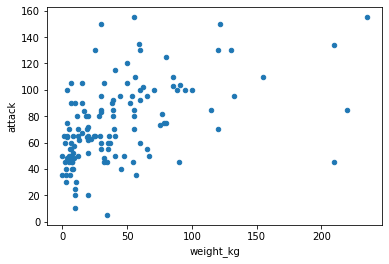

In [5]:
def remove_fatties(dataf, fat=200):
    return dataf.loc[lambda d: d['weight_kg'] < fat]

(clean_df
 .pipe(remove_fatties, fat=300)
 .plot(x='weight_kg',y='attack', kind='scatter')
)

Relatie 1: Speed vs Weight

Zijn grote dikke pokemons traag?

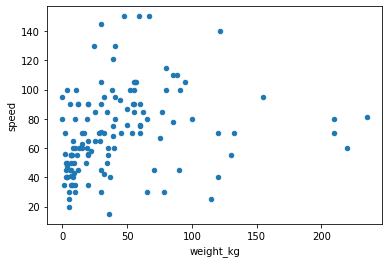

In [6]:
def filter_columns(dataf):
    keep_columns = [
        "speed",
        "weight_kg",
        "generation"
    ]
    return dataf[keep_columns]

def filter_rows(dataf):
    return (dataf
            .loc[lambda d: d['generation'] == 1]
           )

def change_dtypes(dataf):
    return dataf

def preprocess_columns(dataf):
    return dataf

clean_df = (df
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )

def remove_fatties(dataf, fat=200):
    return dataf.loc[lambda d: d['weight_kg'] < fat]

(clean_df
 .pipe(remove_fatties, fat=300)
 .plot(x='weight_kg',y='speed', kind='scatter')
)

Relatie 2: Speed vs Attack

Zijn snelle pokemons slap?

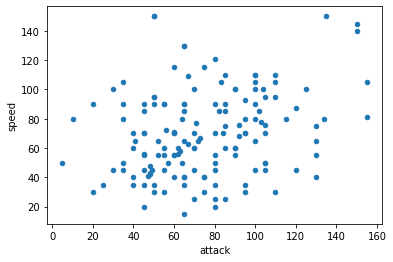

In [7]:
def filter_columns(dataf):
    keep_columns = [
        "speed",
        "attack",
        "generation"
    ]
    return dataf[keep_columns]

def filter_rows(dataf):
    return (dataf
            .loc[lambda d: d['generation'] == 1]
           )

def change_dtypes(dataf):
    return dataf

def preprocess_columns(dataf):
    return dataf

clean_df = (df
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )
(clean_df
 .plot(x='attack',y='speed', kind='scatter')
)

Relatie 3: Attack van legendaries vs non-legendaries

Legendary pokemon zou je verwachten dat ze ook super sterk zijn.

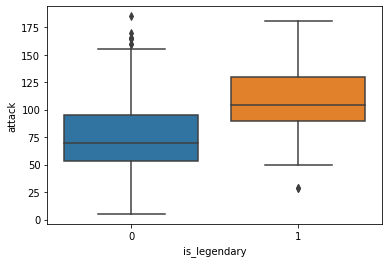

In [8]:
def filter_columns(dataf):
    keep_columns = [
        "is_legendary",
        "attack"
    ]
    return dataf[keep_columns]

def filter_rows(dataf):
    return dataf

def change_dtypes(dataf):
    return dataf

def preprocess_columns(dataf):
    return dataf

clean_df = (df
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )

ax = sns.boxplot(x="is_legendary", y="attack", data=clean_df)

Relatie 4: Attack per type pokemon
    

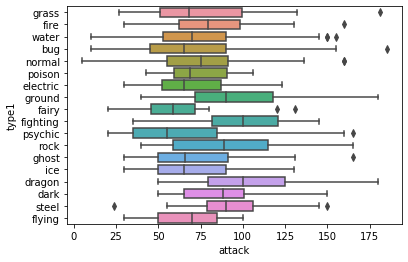

In [9]:
def filter_columns(dataf):
    keep_columns = [
        "type1",
        "attack"
    ]
    return dataf[keep_columns]

def filter_rows(dataf):
    return dataf

def change_dtypes(dataf):
    return dataf

def preprocess_columns(dataf):
    return dataf

clean_df = (df
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )

ax = sns.boxplot(y="type1", x="attack", data=clean_df, orient='h')

Opdracht 2 - maak een classifier voor legendary



In [10]:
df.head().T

,0,1,2,3,4
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1,1,1,0.5,0.5
against_dark,1,1,1,1,1
against_dragon,1,1,1,1,1
against_electric,0.5,0.5,0.5,1,1
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1,1
against_fire,2,2,2,0.5,0.5
against_flying,2,2,2,1,1
against_ghost,1,1,1,1,1


Om een classifier te bouwen zullen we eerst wat pipelines moeten bouwen om ervoor te zorgen dat het dataframe geschikt is voor verdere verwerking. 

Als eerste moeten we weten wat de unieke identifiers zijn die in de dataset zitten (zoals Name, Japanese name, pokedex_number) want die willen we er sowieso uit hebben. Ook als een waarde eventueel voor alle pokemons gelijk is hebben we er niets aan.

In [11]:
unique_values = []
for col in df.columns:
    if df[col].nunique() == df.shape[0]:
        unique_values.append(col)


def remove_cols(dataf, drop_cols=[]):
    return df.loc[:, ~dataf.columns.isin(drop_cols)]

print(unique_values)

['japanese_name', 'name', 'pokedex_number']


One hot encoding voor variabelen met text erin (behalve abilities, zie later)

In [12]:
transform=['type1', 'type2']

def dummify(dataf, cols_to_transform):
    return_df = dataf.loc[:, ~dataf.columns.isin(cols_to_transform)]
    for col in cols_to_transform:
        d = pd.get_dummies(dataf[col])
        return_df = pd.concat([return_df, d], axis=1)
    return return_df

In capture rate staat een gekke waarde. Daar gaan we iets anders voor maken.

In [13]:
print(df['capture_rate'][773])

def impute_meteorite(dataf):
    return_df = dataf.replace({'capture_rate' : '30 (Meteorite)255 (Core)'}, 30)
    return return_df

30 (Meteorite)255 (Core)


Verder, met wat er nu in abilities staat, kunnen we ook even niet zoveel. Dus laten we die voor de test/train split ook eerst verder bekijken.

In [14]:
print(df.abilities[0])



['Overgrow', 'Chlorophyll']


In [15]:

import ast
def one_hot_abilities(dataf):
    all_abilities = []
    for abilities in df.abilities:
        for ability in ast.literal_eval(abilities):
            all_abilities.append(ability)
    all_abilities=list(dict.fromkeys(all_abilities))    
    
    zeros = pd.DataFrame(np.zeros(shape=(df.shape[0], len(all_abilities))), columns=all_abilities)

    for ability in all_abilities:
        true_vector = df.abilities.str.contains(ability).astype('uint8')
        zeros[ability] = true_vector
        
    return_df =  dataf.loc[:, ~dataf.columns.isin(['abilities'])]
    return pd.concat([return_df, zeros], axis=1)



Apply functions

In [16]:


df_base = (df
          .pipe(remove_cols, ['japanese_name', 'name', 'pokedex_number', 'classfication'])
          .pipe(impute_meteorite)
          .pipe(dummify, ['type1', 'type2'])
          .pipe(one_hot_abilities)
          )

## Test - train split maken.
Op basis van is_legendary willen we een test (20%) en train (80%) split maken. Let op hoeveel variabelen we hebben, daar zullen we in moeten snijden.

In [17]:
from sklearn.model_selection import train_test_split

X = df_base
X = X.drop('is_legendary', axis=1)
y = df_base.is_legendary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_train.columns[X_train.isna().any()].tolist())

(640, 296)
(161, 296)
['height_m', 'percentage_male', 'weight_kg']


Moet nog iets aan de NaNs doen...

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cols = X_train.columns

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=cols)
X_test = pd.DataFrame(imputer.transform(X_test), columns=cols)




markdownblock

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
predict_train = clf.predict(X_train)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, predict_train)

array([[587,   1],
       [  4,  48]], dtype=int64)

Confusion matrix ziet er goed uit voor deze classifer. Hoe gaat die op test?

In [21]:
predict_test = clf.predict(X_test)
confusion_matrix(y_test, predict_test)

array([[143,   0],
       [  3,  15]], dtype=int64)